## 1. Import the necessary libraries

In [126]:
from gensim.models import Word2Vec,KeyedVectors
import numpy as np
from tqdm import tqdm
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.utils import plot_model
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
import import_ipynb
from tensorflow.keras.callbacks import EarlyStopping
from EDASentimentAnalysis import remove_pucntuation,remove_stopword
from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2 Data preprocessing

> Read File CSV

In [127]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [128]:
X_train,y_train = ReadData("../DataPhone/trainprocessed.csv")
X_test,y_test=ReadData("../DataPhone/testprocesssed.csv")

In [129]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(7786,)
y_train size (7786,)


> word separation

In [130]:
def wordseparation(comment):
    return [review.split() for review in comment]

In [131]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', '832019', 'tình_trạng', 'pin', 'còn', '88', 'ai', 'giống', 'tôi'], ['sao', 'gọi', 'điện_thoại', 'màn_hình', 'chấm', 'nhỏ', 'nháy', 'gần', 'camera', 'vậylúc']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', '45', 'tuy', 'chip', '439', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivo91c', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


> word embedding

In [132]:
model_wordembedding = Word2Vec(sentences=X_train, vector_size=128, window=5, min_count=0, workers=4, sg=1)
model_wordembedding.wv.save("../model/word.model")

> Load Model_Word2Vec

In [133]:
model_embedding = KeyedVectors.load('../model/word.model')
num_words = len(model_embedding.index_to_key)
print("Number of Words:", num_words)
print("Vector:", model_embedding.get_vector('phần_mềm'))

Number of Words: 11616
Vector: [-0.31874043 -0.5412574   0.12319501  0.15175016  0.21352021 -0.22543056
 -0.27555206 -0.13488132 -0.07143969  0.2826602   0.4328971   0.11816367
 -0.08424852 -0.02135711  0.18119206  0.42721528 -0.396077    0.03838279
  0.04780084  0.15740804  0.02875876  0.30908808 -0.12331665 -0.52865523
  0.05168058  0.32002118 -0.33175865  0.23572192 -0.060262   -0.30375382
 -0.02601419 -0.05189504  0.18468696  0.22552818 -0.08922354 -0.14933002
  0.4867634  -0.09392262  0.08067321  0.02323722 -0.2587831   0.15027837
  0.08543258 -0.11516653  0.22145781  0.38219336 -0.32105136 -0.332214
 -0.03403653  0.20868838  0.08717184  0.0937431   0.21270885  0.1654245
 -0.03478407  0.01922317  0.49892846 -0.21181397 -0.10317007  0.18195091
  0.16703387  0.00087364  0.186209   -0.07433943  0.19900283 -0.1411852
  0.17446609 -0.13188322 -0.19683506 -0.24921307  0.10482956 -0.45633402
 -0.26132372 -0.06656513  0.08689959 -0.30443782  0.01074507  0.2193003
 -0.46797302 -0.03238862 

> Get a list of vector representations of words

In [134]:
# Lấy danh sách các vectơ từ
vectors = [model_embedding.get_vector(word) for word in model_embedding.index_to_key]
vectors_array = np.array(vectors)
# Giảm chiều dữ liệu từ 128 chiều xuống còn 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors_array)
print(vectors_2d[0:2])

[[84.568474 -2.847636]
 [90.71674   6.838921]]


> Visualize the context and semantic correlation of words

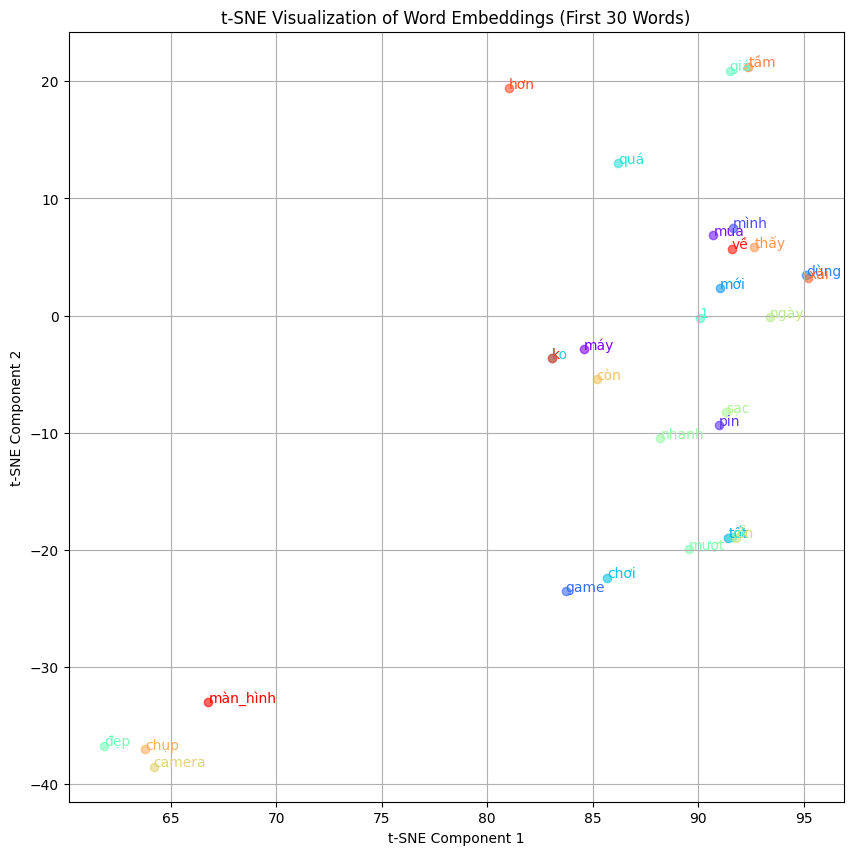

In [135]:
# Trực quan hóa các vectơ từ
plt.figure(figsize=(10, 10))
num_words = 30
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, num_words))

# Vẽ các điểm dữ liệu (từ) với màu khác nhau
for i, word in enumerate(model_embedding.index_to_key[:num_words]):  
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], marker='o', color=colors[i], alpha=0.6)
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=10, color=colors[i])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Word Embeddings (First 30 Words)')
plt.grid(True)
plt.show()


> Corpus

In [136]:
model_embedding.key_to_index

{'máy': 0,
 'mua': 1,
 'pin': 2,
 'mình': 3,
 'game': 4,
 'dùng': 5,
 'mới': 6,
 'tốt': 7,
 'chơi': 8,
 'ko': 9,
 'quá': 10,
 'ok': 11,
 '1': 12,
 'giá': 13,
 'đẹp': 14,
 'mượt': 15,
 'nhanh': 16,
 'sạc': 17,
 'ngày': 18,
 'ổn': 19,
 'camera': 20,
 'còn': 21,
 'chụp': 22,
 'thấy': 23,
 'tầm': 24,
 'xài': 25,
 'hơn': 26,
 'k': 27,
 'về': 28,
 'màn_hình': 29,
 'trâu': 30,
 'trong': 31,
 'hơi': 32,
 'đc': 33,
 'khá': 34,
 'sản_phẩm': 35,
 '2': 36,
 'lỗi': 37,
 'tay': 38,
 'tháng': 39,
 'sao': 40,
 'hay': 41,
 'nhân_viên': 42,
 'mọi': 43,
 'sử_dụng': 44,
 'con': 45,
 'hình': 46,
 'sài': 47,
 'hết': 48,
 'vân': 49,
 'nói_chung': 50,
 'nhiệt_tình': 51,
 'ngon': 52,
 'thứ': 53,
 'nóng': 54,
 'lắm': 55,
 '3': 56,
 'nghe': 57,
 'nó': 58,
 'loa': 59,
 'luôn': 60,
 'điện_thoại': 61,
 'khác': 62,
 'tệ': 63,
 'lag': 64,
 'ảnh': 65,
 'người': 66,
 'wifi': 67,
 'xem': 68,
 'mấy': 69,
 'ở': 70,
 'nào': 71,
 'biết': 72,
 'bạn': 73,
 'lần': 74,
 'cấu_hình': 75,
 'dc': 76,
 'đổi': 77,
 'nói': 78,
 'hàng'

> Check to see how many words the longest sentence has

In [137]:
max_sequence = max([len(seq) for seq in X_train])
max_sequence_t=max ([len(seq) for seq in X_test ])
print(max_sequence)
print(max_sequence_t)

129
131


> representation for unknown words

In [138]:
embedding_size = 128

> convert words to vector space and padding

In [139]:
def comment_embedding(comment):
    matrix = np.zeros((131, embedding_size))
    for i, word in enumerate(comment):
            if word in model_embedding:
                matrix[i] = model_embedding.get_vector(word)
    return matrix

> Execute Function

In [140]:
train_data = []
test_data =[]
for x in tqdm(X_train):
    train_data.append(comment_embedding(x))
for y in tqdm(X_test): 
    test_data.append(comment_embedding(y))
test_data=np.array(test_data)
train_data=np.array(train_data)

100%|██████████| 2224/2224 [00:00<00:00, 10578.94it/s]


> Convert labels to numbers

In [141]:
label_encoder = LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
print(y_train_encoded[0:3])

[1 0 1]


> Convert label to one_hot_vector

In [142]:
# Biểu diễn nhãn dưới dạng one-hot vector
y_train_onehot = to_categorical(y_train_encoded)
print(y_train_onehot[0:3])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 3.Built Model CNN

### 3.1. Design configuration for CNN network

In [143]:
num_classes = 3
filter_sizes = 3
num_filters = 150
epochs = 70
dropout_rate = 0.3
embedding_size=128

> transform input properties

In [144]:
x_train = train_data.reshape(train_data.shape[0], 131, embedding_size, 1).astype('float32')

### 3.2. Model CNN

In [145]:
# Define the model
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(num_filters, (filter_sizes, embedding_size), activation='relu',
                 input_shape=(131, embedding_size, 1),name='convolution_layer'))
model.add(MaxPooling2D(pool_size=(2, 1),strides=(2, 1),name='max_pooling'))
model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(9, activation='relu',name='layer_dense_1'))
model.add(Dense(9, activation='relu',name='layer_dense_2'))
model.add(Dense(9, activation='relu',name='layer_dense_3'))
model.add(Dense(9, activation='relu',name='layer_dense_4'))
model.add(Dense(9, activation='relu',name='layer_dense_5'))
model.add(Dense(9, activation='relu',name='layer_dense_6'))
model.add(Dense(9, activation='relu',name='layer_dense_7'))
model.add(Dense(9, activation='relu',name='layer_dense_8'))
model.add(Dense(3, activation='softmax'))

c:\Users\hdang\.virtualenvs\DM-xmUrTfoX\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### 3.3. Hyperparameter

In [146]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 3.4. Train

> Monitor the trainning process to stop earlier

In [147]:
# Khởi tạo callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss', 
    patience=50,          
    restore_best_weights=True  
)

In [148]:
model.fit(
    x_train,
    y_train_onehot,
    verbose=1,
    epochs=epochs,
    validation_split=0.2,  # Phân chia dữ liệu validation từ tập huấn luyện
    callbacks=[early_stopping_callback]  # Sử dụng callback EarlyStopping
)

Epoch 1/70
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5181 - loss: 0.9707 - val_accuracy: 0.7709 - val_loss: 0.7234
Epoch 2/70
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7527 - loss: 0.7339 - val_accuracy: 0.7856 - val_loss: 0.6503
Epoch 3/70
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7801 - loss: 0.6363 - val_accuracy: 0.8049 - val_loss: 0.5291
Epoch 4/70
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7868 - loss: 0.5544 - val_accuracy: 0.8036 - val_loss: 0.5137
Epoch 5/70
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7991 - loss: 0.5305 - val_accuracy: 0.8087 - val_loss: 0.5051
Epoch 6/70
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8061 - loss: 0.5095 - val_accuracy: 0.8145 - val_loss: 0.5038
Epoch 7/70
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8122 - loss: 0.4862 - val_accuracy: 0.8094 - val_loss: 0.5047
Epoch 8/70
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8099 - loss: 0.4807 - val_accu

>Network Architecture

In [149]:
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolution_layer (Conv2D)      │ (None, 129, 1, 150)    │        57,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling (MaxPooling2D)      │ (None, 64, 1, 150)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 1, 150)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_1 (Dense)           │ (None, 9)              │        86,409 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_2 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_3 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_4 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_5 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_6 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_7 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_8 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,459 (1.66 MB)

 Trainable params: 144,819 (565.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 289,640 (1.10 MB)

None


> Network Architecture Diagram

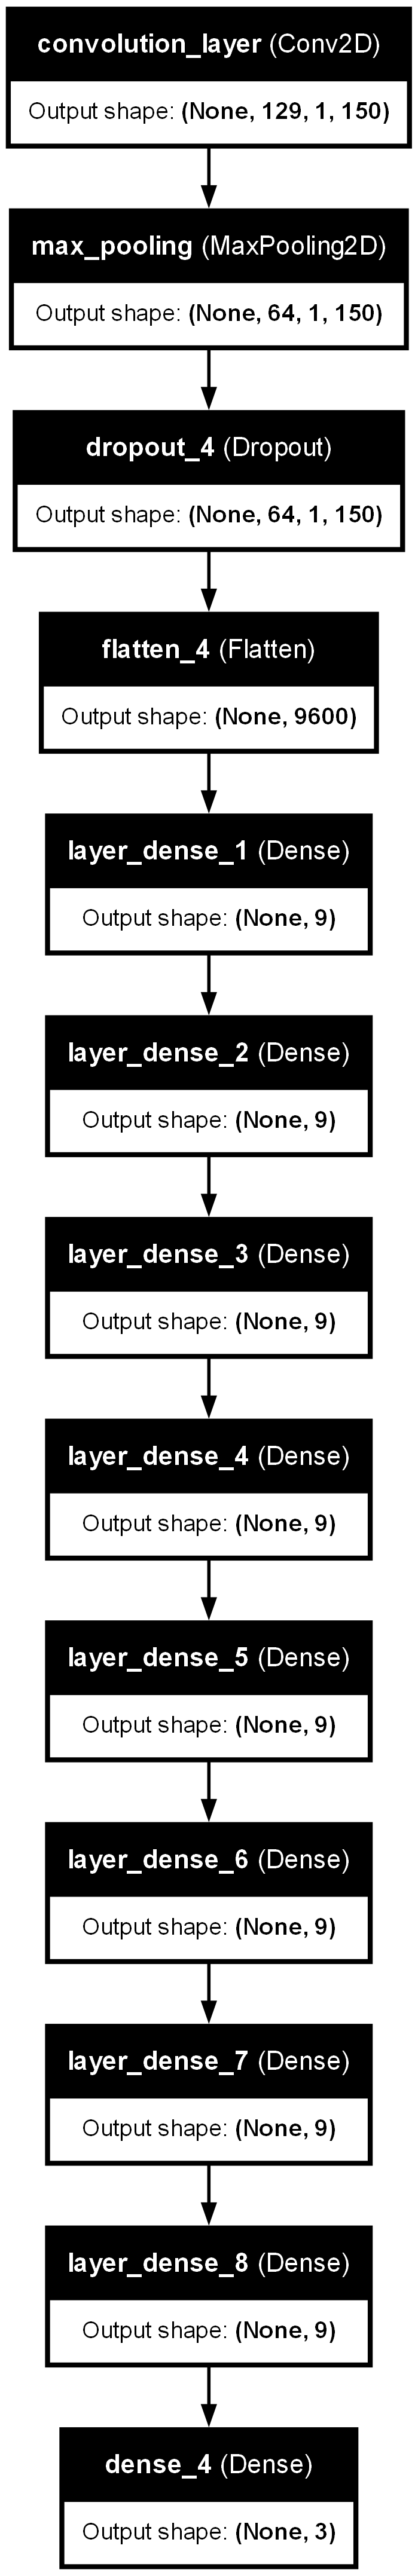

In [150]:
plot_model(model, to_file='../Picture_Model/model_CNN_sentiment_plot.png', show_shapes=True, show_layer_names=True)

> Dump file model_cnn_sentiment.h5

In [151]:
model.save('../model/model_cnn_sentiment.h5')

### 3.5 Evaluation test dataset

> Load file models_sentiment.h5

In [152]:
model_sentiment=load_model("../model/model_cnn_sentiment.h5")

> predict  test dataset 

In [153]:
result = model_sentiment.predict(test_data)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


> First 10 lines of comments

In [154]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[0:10])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[0:10])


[2 2 2 0 2 0 2 2 2 2]
['Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive']


> Predict one a new sample

In [155]:
comment = "Tôi mới mua iphone 15 pro max pin trâu màn hình đẹp dễ sử dụng"
comment = remove_pucntuation(comment.lower())
comment = remove_stopword(comment)
comment = [ViTokenizer.tokenize(comment)]
print(comment)
separatemeaningfulwords = wordseparation(comment)
maxtrix_embedding =np.expand_dims(comment_embedding(separatemeaningfulwords[0]),axis=0)
result_one = model_sentiment.predict(maxtrix_embedding)
result_one = np.argmax(result_one,axis=1)
# Decode the predicted labels
print(label_encoder.inverse_transform(result_one))


['tôi mới mua iphone 15 pro max pin trâu màn_hình đẹp dễ sử_dụng']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
['Positive']


> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [156]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.8089
Precision: 0.7290
Recall: 0.8089
F1-score: 0.7662836716817495


c:\Users\hdang\.virtualenvs\DM-xmUrTfoX\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
